In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/feature_engineered_data.pkl")
print(df.shape)
df.head()

(1665688, 10)


,customer_id,event_count,order_shipped,num_accounts,first_event,last_event,len_journey,days_in_journey,first_stage,last_stage
0,-2147483541,29,0,1,12,1,29,238,1,0
1,-2147481037,7,0,1,12,6,7,0,1,5
2,-2147474335,25,1,1,2,28,25,17,3,6
3,-2147474305,32,0,1,6,21,32,196,5,7
4,-2147472167,39,1,1,12,28,39,19,1,6


In [3]:
y = df['order_shipped']
X = df.drop(['order_shipped', 'customer_id'], axis = 1)

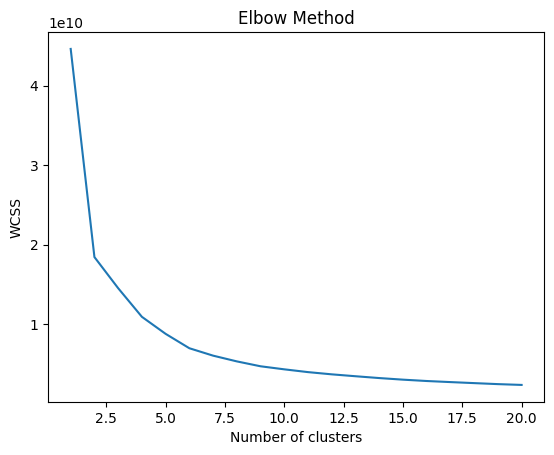

In [4]:
wcss = []
for i in range(1, 21): # Testing 1 to 20 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) # multiple initializations
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Step 4: Plot the Elbow Curve
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## 6 clusters

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# The cluster labels for each data point
labels = kmeans.labels_

# You can add these labels back to your original DataFrame if you wish
df['Cluster'] = labels

In [6]:
df.head()

,customer_id,event_count,order_shipped,num_accounts,first_event,last_event,len_journey,days_in_journey,first_stage,last_stage,Cluster
0,-2147483541,29,0,1,12,1,29,238,1,0,3
1,-2147481037,7,0,1,12,6,7,0,1,5,3
2,-2147474335,25,1,1,2,28,25,17,3,6,1
3,-2147474305,32,0,1,6,21,32,196,5,7,1
4,-2147472167,39,1,1,12,28,39,19,1,6,0


In [7]:
import seaborn as sns

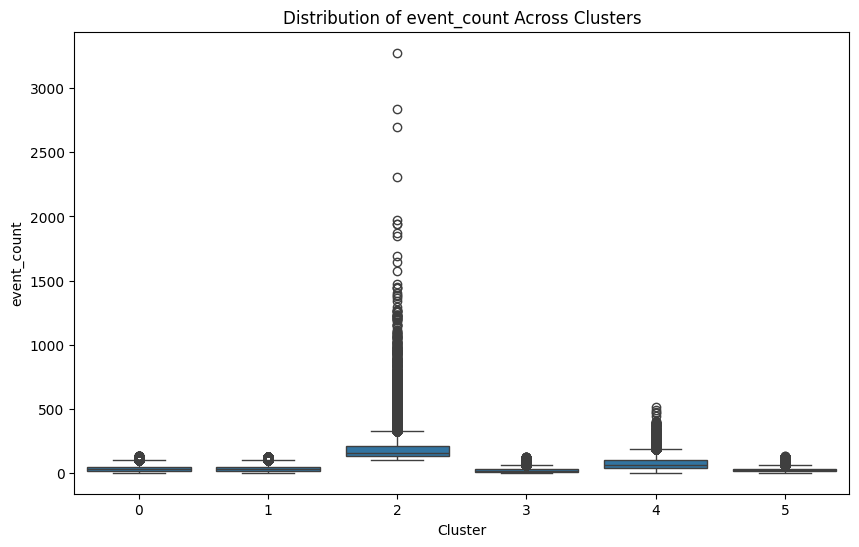

In [8]:
# Choose a feature to plot
feature_to_plot = 'event_count'

plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y=feature_to_plot, data=df)
plt.title(f'Distribution of {feature_to_plot} Across Clusters')
plt.show()

In [9]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X_scaled.columns)
print(centers)

   event_count  num_accounts  first_event  last_event  len_journey  \
0     0.047274     -0.204254     0.754147    1.220635     0.047274   
1     0.025850     -0.204254    -0.825904    0.621457     0.025850   
2     3.589968      0.114841    -0.105336    0.380514     3.589968   
3    -0.334941     -0.204254     0.462134   -0.552303    -0.334941   
4     0.908245      4.773960     0.041291   -0.101931     0.908245   
5    -0.215979     -0.204254    -0.827538   -0.649771    -0.215979   

   days_in_journey  first_stage  last_stage  
0        -0.202762    -0.584393    1.016372  
1        -0.074231     0.997898    0.961475  
2         0.477726     0.019787    0.402795  
3        -0.128834    -0.679381   -0.428191  
4         0.115702    -0.021349    0.005263  
5         0.416552     0.960774   -1.078884  


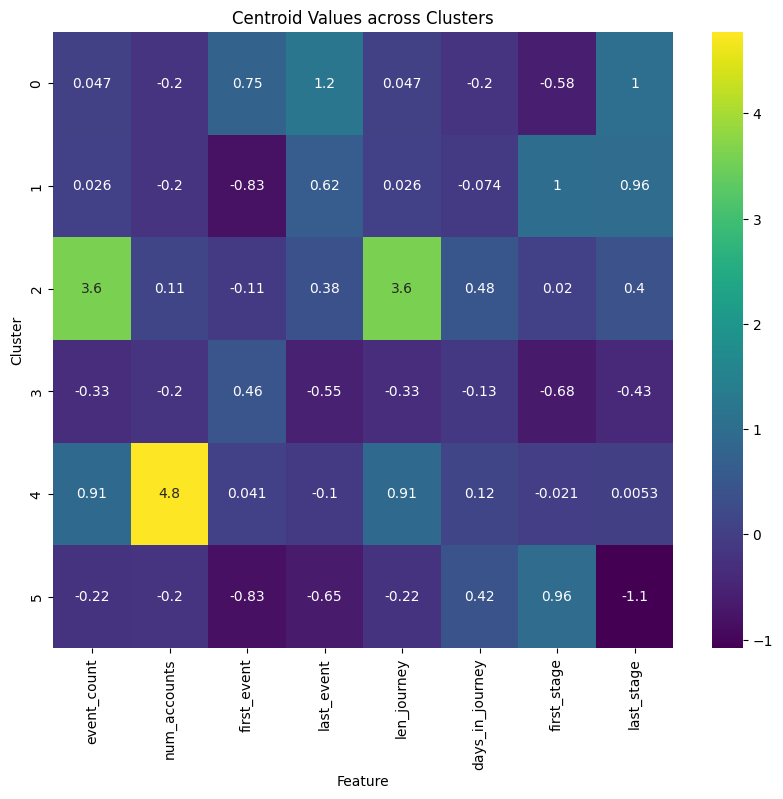

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(centers, annot=True, cmap='viridis')
plt.title('Centroid Values across Clusters')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

In [11]:
df.head()

,customer_id,event_count,order_shipped,num_accounts,first_event,last_event,len_journey,days_in_journey,first_stage,last_stage,Cluster
0,-2147483541,29,0,1,12,1,29,238,1,0,3
1,-2147481037,7,0,1,12,6,7,0,1,5,3
2,-2147474335,25,1,1,2,28,25,17,3,6,1
3,-2147474305,32,0,1,6,21,32,196,5,7,1
4,-2147472167,39,1,1,12,28,39,19,1,6,0


In [12]:
cluster_0 = df[df['Cluster'] == 0]
cluster_0_cust = cluster_0['customer_id'].to_list()
print(cluster_0.shape)

(287133, 11)


In [13]:
cluster_1 = df[df['Cluster'] == 1]
cluster_1_cust = cluster_1['customer_id'].to_list()
print(cluster_1.shape)

(306306, 11)


In [14]:
cluster_2 = df[df['Cluster'] == 2]
cluster_2_cust = cluster_2['customer_id'].to_list()
print(cluster_2.shape)

(56258, 11)


In [15]:
cluster_3 = df[df['Cluster'] == 3]
cluster_3_cust = cluster_3['customer_id'].to_list()
print(cluster_3.shape)

(641135, 11)


In [16]:
cluster_4 = df[df['Cluster'] == 4]
cluster_4_cust = cluster_4['customer_id'].to_list()
print(cluster_4.shape)

(64749, 11)


In [17]:
cluster_5 = df[df['Cluster'] == 5]
cluster_5_cust = cluster_5['customer_id'].to_list()
print(cluster_5.shape)

(310107, 11)


## Inspecting entire dataframe per cluster

In [19]:
df_whole = pd.read_pickle("/Users/alyssaliu/Desktop/StatsM148/wide_format_data_no_duplicates.pkl")

In [20]:
cluster_1_df = df_whole[df_whole['customer_id'].isin(cluster_1_cust)]
cluster_2_df = df_whole[df_whole['customer_id'].isin(cluster_2_cust)]
cluster_3_df = df_whole[df_whole['customer_id'].isin(cluster_3_cust)]
cluster_4_df = df_whole[df_whole['customer_id'].isin(cluster_4_cust)]
cluster_5_df = df_whole[df_whole['customer_id'].isin(cluster_5_cust)]

In [21]:
cluster_1_df.head()

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end
2,-2147474335,[-1929965268],"[2, 12, 19, 3, 4, 4, 19, 4, 1, 11, 4, 5, 11, 4...","[campaign_click, application_web_approved, app...","[2023-04-14 01:42:50+00:00, 2023-04-14 19:42:5...","[1, 2, 3, 16, 17, 19, 22, 23, 24, 25, 27, 33, ..."
3,-2147474305,[1098145658],"[6, 19, 19, 19, 19, 19, 19, 19, 1, 4, 19, 19, ...","[begin_checkout, application_web_view, applica...","[2021-11-28 22:27:11+00:00, 2021-11-28 22:28:0...","[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 1..."
6,-2147466262,[-296951572],"[2, 13, 19, 19, 12, 1, 4, 5, 19, 6, 3, 11, 2, 4]","[campaign_click, application_web_declined, app...","[2023-04-10 02:34:58+00:00, 2023-04-10 20:34:5...","[1, 2, 3, 6, 7, 8, 9, 10, 11, 39, 41, 45, 47, 48]"
17,-2147444185,[-1943533769],"[2, 12, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 21, 2...","[campaign_click, application_web_approved, pro...","[2021-10-10 06:00:00+00:00, 2021-10-10 13:58:3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
18,-2147441052,[-1102018764],"[2, 12, 4, 4, 24, 24, 24, 1, 1, 21, 1, 4, 11, ...","[campaign_click, application_web_approved, bro...","[2021-06-03 06:00:00+00:00, 2021-06-03 19:22:1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [22]:
def create_flow_counts(df):
    # Initialize an empty list to store the source-target pairs
    source_target_pairs = []

    # Iterate over each list in the DataFrame
    for path in df['event_name']:
        # Extract pairs from each list
        pairs = [(path[i], path[i+1]) for i in range(len(path)-1)]
        source_target_pairs.extend(pairs)

    # Convert the pairs into a DataFrame
    pairs_df = pd.DataFrame(source_target_pairs, columns=['source', 'target'])
    
    # Aggregate and count the frequency of each pair
    flow_counts = pairs_df.groupby(['source', 'target']).size().reset_index(name='value')
    
    # Create lists of unique sources and targets to define nodes
    all_nodes = list(set(flow_counts['source']).union(set(flow_counts['target'])))
    node_dict = {node: i for i, node in enumerate(all_nodes)}

    # Map sources and targets to their respective indices
    flow_counts['source_id'] = flow_counts['source'].map(node_dict)
    flow_counts['target_id'] = flow_counts['target'].map(node_dict)
    
    return flow_counts

In [23]:
clust_1_flow_counts = create_flow_counts(cluster_1_df)
clust_2_flow_counts = create_flow_counts(cluster_2_df)
clust_3_flow_counts = create_flow_counts(cluster_3_df)
clust_4_flow_counts = create_flow_counts(cluster_4_df)
clust_5_flow_counts = create_flow_counts(cluster_5_df)

In [24]:
clust_1_flow_counts

,source,target,value,source_id,target_id
0,account_activitation,account_activitation,14,14,14
1,account_activitation,account_downpaymentcleared,31641,14,13
2,account_activitation,account_downpaymentreceived,620,14,21
3,account_activitation,add_to_cart,1213,14,12
4,account_activitation,application_phone_approved,734,14,11
...,...,...,...,...,...
481,view_cart,place_order_web,1584,16,7
482,view_cart,pre-application_(3rd_party_affiliates),27,16,10
483,view_cart,promotion_created,57329,16,24
484,view_cart,site_registration,1172,16,19


In [25]:
clust_1_flow_counts[clust_1_flow_counts['source'] == clust_1_flow_counts['target']]

,source,target,value,source_id,target_id
0,account_activitation,account_activitation,14,14,14
57,add_to_cart,add_to_cart,11077,12,12
81,application_phone_approved,application_phone_approved,3,11,11
98,application_phone_declined,application_phone_declined,1,3,3
111,application_web_approved,application_web_approved,20,25,25
135,application_web_declined,application_web_declined,34,20,20
158,application_web_submit,application_web_submit,32936,0,0
183,application_web_view,application_web_view,723415,6,6
207,begin_checkout,begin_checkout,50010,4,4
232,browse_products,browse_products,2373813,18,18


import plotly.graph_objects as go


# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
    ),
    link=dict(
        source=flow_counts['source_id'],
        target=flow_counts['target_id'],
        value=flow_counts['value']
    )
)])

fig.update_layout(title_text="Example Sankey Diagram", font_size=10)
fig.show()
